In [1]:
import numpy as np
x=np.array([0,1,2,3])
y=np.array([1,2,3,4])
x.reshape(4,1)
y.reshape(4,1)
print(x*y) # element-wise multiplication
print(np.dot(x,y)) # matrix multiplication or dot product

[ 0  2  6 12]
20


In [2]:
# make data for linear regression
from matplotlib import pyplot as plt
x=2*np.random.rand(100,1)
y=4+2*x+np.random.randn(100,1)

plt.scatter(x,y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
# Compute θ using the Normal Equation
from numpy.linalg import inv

x_b = np.c_[np.ones((100,1)), x] # add x0 to each instance, prepare x for linear regression
theta = np.dot ( (inv(np.dot( np.transpose(x_b), x_b))) , (np.dot(np.transpose(x_b),y)) )   # my way
theta = inv(x_b.T.dot(x_b)).dot(x_b.T.dot(y)) # easier way 
theta

array([[4.15022002],
       [1.83344835]])

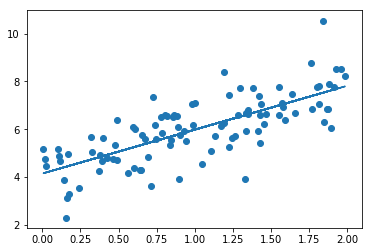

In [4]:
# Make prediction using theta
y_pred = theta[0] + x*theta[1]
plt.scatter(x,y)
plt.plot(x, y_pred)
plt.show()

In [5]:
# Linear regression with sklearn -> it uses
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_


(array([4.15022002]), array([[1.83344835]]))

In [6]:
# Lets try to plot the convex function of mean squared error

y_pred =0
rng =1000
theta_0 = np.linspace(-100, 100, rng)
theta_1 = np.linspace(-60, 60, rng)
error = np.empty((rng,1)) # arrays should be constructed using zeros, ones, empty functions, do not use ndarray()
for i in range(rng):
    y_pred = theta_0[i] + x*theta_1[i] 
    error[i] = np.sum(np.square(y - y_pred))/len(x)



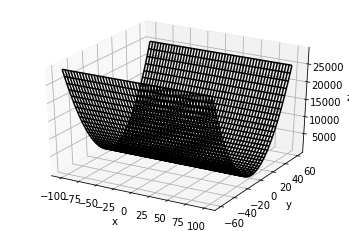

In [7]:
from mpl_toolkits import mplot3d

X, Y = np.meshgrid(theta_0, theta_1)
Z = error
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='binary')

ax.plot_wireframe(X, Y, Z, color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [8]:
# Linear regression with gradient descent
theta = np.random.rand(2,1)
eta = 0.1
n_iterations = 100
m = len(x)
for i in range(n_iterations):
    gradient = 2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta = theta - eta*gradient
print(theta)
# it [[3.87479548] [1.9549495 ]] for 1000 iterations

[[4.0723554 ]
 [1.89942995]]


In [9]:
# Batch Gradient Descent using a simple learning schedule (self)
theta = np.random.rand(2,1)
eta = 0.5
n_iterations = 100
m = 100
for i in range(n_iterations):
    gradient = (2/m) * x_b.T.dot(x_b.dot(theta)-y)
    if (i%10==0):
        eta = eta-0.05
        print('new eta', eta)
    theta = theta - eta*gradient
print(theta)


new eta 0.45
new eta 0.4
new eta 0.35000000000000003
new eta 0.30000000000000004
new eta 0.25000000000000006
new eta 0.20000000000000007
new eta 0.15000000000000008
new eta 0.10000000000000007
new eta 0.05000000000000007
new eta 6.938893903907228e-17
[[4.14829089]
 [1.83508308]]


In [10]:
# Stochastic Gradient Descent using a simple learning schedule (self)
theta = np.random.rand(2,1)
eta = 0.55
n_epochs = 50
m = 100
for i in range(n_epochs):
    for j in range(m):
        rand = np.random.randint(m)
        xj = x_b[rand:rand+1]
        yj = y[rand:rand+1]
        gradient = 2 * xj.T.dot(xj.dot(theta)-yj)
        theta = theta - eta*gradient
    if (i%10==0):
        eta = eta-0.1
        print('new eta', eta)
    
print(theta)


new eta 0.45000000000000007
new eta 0.3500000000000001
new eta 0.2500000000000001
new eta 0.1500000000000001
new eta 0.0500000000000001
[[3.63032331]
 [1.49914158]]


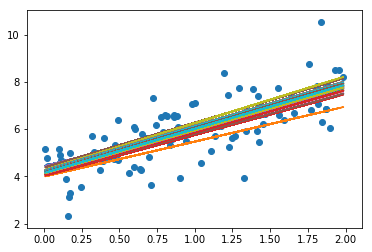

[[4.14454053]
 [1.86952484]]


In [11]:
# Stochastic Gradient Descent using a learning schedule (from the book) and plot the steps

t0, t1 = 10, 20 # hence initial value of eta will be 0.5 will start from 0.5
theta = np.random.rand(2,1)
n_epochs = 50
m = 100

def learning_schedule(t):
        return t0/(t+t1)
    

for epoch in range(n_epochs):
    for i in range(m):
        rand = np.random.randint(m)
        xi = x_b[rand:rand+1]
        yi = y[rand:rand+1]
        gradient = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradient
 
    y_pred = theta[0]+theta[1]*x
    plt.plot(x,y_pred)

        
plt.scatter(x,y)
plt.show()
    
print(theta)


In [12]:
# Linear regression using stochastic gradient descent with Scikit learn

from sklearn.linear_model import SGDRegressor

sgd_regress = SGDRegressor(max_iter=1000, tol=0.1e-3, eta0=0.1, penalty=None)
sgd_regress.fit(x,y.ravel())
sgd_regress.intercept_, sgd_regress.coef_

(array([4.08848827]), array([1.86401551]))

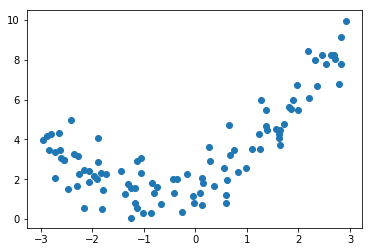

In [13]:
# Polynomial regression
np.random.seed(42)

m = 100
x = 6* np.random.rand(m, 1) -3
y = 0.5*np.square(x) + x + 2 + np.random.randn(m,1)# square of a numpy array can be taken as x**2 or np.square(x)
plt.scatter(x,y)
plt.show()

In [14]:
# Polynomial regression with Linear regression model

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
x_poly = poly_features.fit_transform(x) # X_poly now contains the original feature of X plus the square of this feature
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(x_poly,y)
poly_lin_reg.intercept_, poly_lin_reg.coef_


(array([1.78134581]), array([[0.93366893, 0.56456263]]))

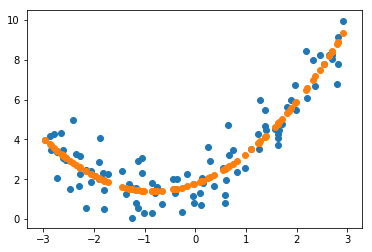

In [15]:
y_poly_pred = poly_lin_reg.intercept_ + poly_lin_reg.coef_[0][0]*x + poly_lin_reg.coef_[0][1]*x**2
plt.scatter(x,y)
plt.scatter(x, y_poly_pred)
plt.show()

/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always comple

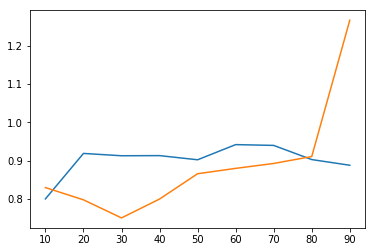

In [16]:

##### MY PERSONAL WRONG INTERPRETATION OF THE PROBLEM ######


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def plot_learningcurve(model, x, y):
    train_rmse = []
    val_rmse = []
    for i in range(1,10):
        # split data into training and validation
        x_train, x_val, y_train, y_val = train_test_split(x,y, train_size=i/10, random_state=42)
        # train on training set 
        model.fit(x_train,y_train)
        # get predictions on training set
        y_train_pred = model.predict(x_train)
        # calculate train_rmse
        train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        # get predictions on validation set
        y_val_pred = model.predict(x_val)
        # calculate val_rmse
        val_rmse.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
    val_rmse.reverse()
    
    # plot
    plt.plot(np.arange(start= 10, stop = 100, step=10), train_rmse)
    plt.plot(np.arange(start= 10, stop = 100, step=10), val_rmse)
    plt.show()
    
    
plot_learningcurve(lin_reg, x_poly, y)

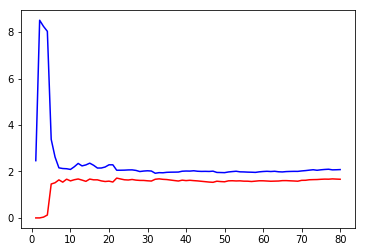

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, x, y):
    train_rmse, val_rmse = [], []
    x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2)
    for m in range(1, len(x_train)+1):
        model.fit(x_train[:m],y_train[:m])
        y_train_pred = model.predict(x_train[:m])
        y_val_pred = model.predict(x_val)
        train_rmse.append(np.sqrt(mean_squared_error(y_train[:m], y_train_pred)))
        val_rmse.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
    plt.plot(np.arange(start= 1,stop= m+1), train_rmse, 'r')
    plt.plot(np.arange(start= 1,stop= m+1), val_rmse, 'b')
    
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, x, y)

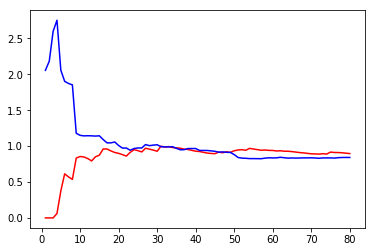

In [18]:
    
poly_lin_reg = LinearRegression()
plot_learning_curve(poly_lin_reg, x_poly, y)

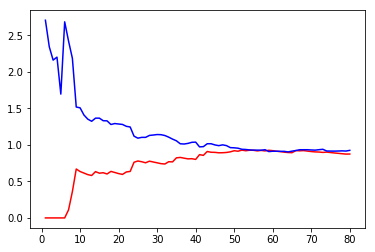

In [19]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
('poly_features', PolynomialFeatures(degree=5, include_bias=False)),
('lin_reg', LinearRegression())    
])
#polynomial_regression.fit(x,y) # when you call fit() with a pipeline, all transformers call fit_transform(), last transformer/estimator calls fit()
plot_learning_curve(polynomial_regression, x, y)



In [20]:
# Ridge Regression with Gradient Descent

ridge_reg = SGDRegressor(penalty='l2')
ridge_reg.fit(x,y)
ridge_reg.predict([[.02]])

/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2.68430375])

In [21]:
# Early stopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.base import clone

# Split into train test
x_train, x_val, y_train, y_val= train_test_split(x,y)

# build pipeline for getting polynomial features, and scaling
poly_scaler = Pipeline([
    ('poly', PolynomialFeatures(degree=10,include_bias=False)),
    ('scaler', StandardScaler())
])

# pre-process train and val data through pipeline
x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.fit_transform(x_val)

# construct the SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, penalty=None, warm_start=True, learning_rate='constant', eta0=0.0005)
# eta0 -> initial learning rate, 
# warm_start -> learning will resume from where it left when the .fit() method was called last time
# penalty -> regularization, l1 or l2
# tol -> used for default early stopping. learning will stop when loss > best_loss - tol. if tol= np.infty, early stopping wont work by default.
# max_iter -> max epochs

best_mse = float('inf') 
best_model = None
best_epoch = None

# run multiple epochs in loop
for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled,y_train)
    y_val_predicted = sgd_reg.predict(x_val_poly_scaled)
    mse = mean_squared_error(y_val, y_val_predicted)
    # after each epoch check if the VALIDATION ERROR is minimum
    if mse < best_mse:
        best_mse = mse
        best_model = clone(sgd_reg)
        best_epoch = epoch
    


/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [22]:
print('best_epoch', best_epoch, 'best_mse', best_mse)


best_epoch 401 best_mse 1.1166156081591065


In [23]:
# trying to do early stopiing with SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 0.0004, penalty=None, learning_rate='constant', eta0=0.0005, early_stopping=True)
sgd_reg.fit(x_train_poly_scaled,y_train)
y_val_predicted = sgd_reg.predict(x_val_poly_scaled)
mse = mean_squared_error(y_val, y_val_predicted)
print (sgd_reg)
print(mse)

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
       eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=0.0004,
       validation_fraction=0.1, verbose=0, warm_start=False)
1.2289941458337421


/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


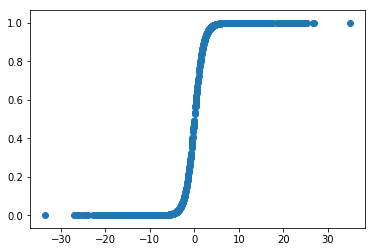

In [24]:
# drawing the logistic function

x = 10*(np.random.randn(1,1000))
y = 1/(1+np.exp(-x))
plt.scatter(x,y)
plt.show()


[]

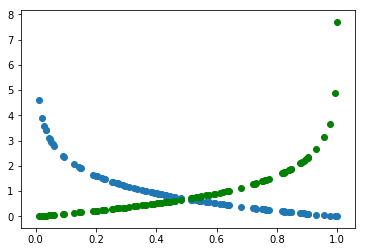

In [25]:
# understanding the cost function

p_hat = np.random.rand(1,100)
c1 = -np.log(p_hat) # the closer p_hat is to 1, the lesser the c1. But it is not linear. The farther p_hat goes from 1, the bigger c1 gets
plt.scatter(p_hat,c1)
plt.plot()


c2 = -np.log(1-p_hat) # the closer p_hat is to 0, the lesser the c2. But it is not linear. The farther p_hat goes from 0, the bigger c2 gets
plt.scatter(p_hat,c2, c='g')
plt.plot()



[]

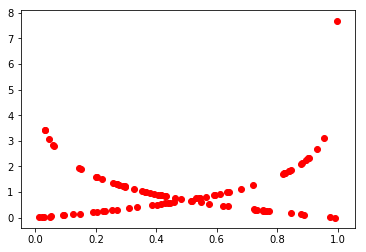

In [26]:
y = (np.random.rand(1,100) > 0.5) + 0

c =  -y * (np.log(p_hat)) - (1-y) * np.log(1-p_hat) 
plt.scatter(p_hat,c, c='r')
plt.plot()

In [27]:
# Build a classifier to detect the Iris-Virginica type based only on the petal width feature

# Import the data
from sklearn.datasets import load_iris

iris = load_iris()

In [28]:
print(iris.keys())
iris['feature_names']
print(iris['feature_names'])
x = iris['data'][:, 3:] # slice data to get only one feature, petal width
y = (iris['target']==2).astype(np.int)# converted from multiclass to binary


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [29]:
# Logistic Regression for binary classification
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x,y)


/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

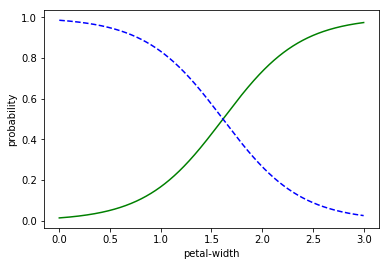

In [30]:
# Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm 

x_new = np.linspace(0,3,1000).reshape(-1,1)
y_new_pred = log_reg.predict_proba(x_new) # not predict, but predict_proba
plt.plot(x_new, y_new_pred[:, 1], "g-", label="Iris-Virginica")
plt.plot(x_new, y_new_pred[:, 0], "b--", label="Not Iris-Virginica")
plt.xlabel('petal-width')
plt.ylabel('probability')
plt.show()



/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'petal width')

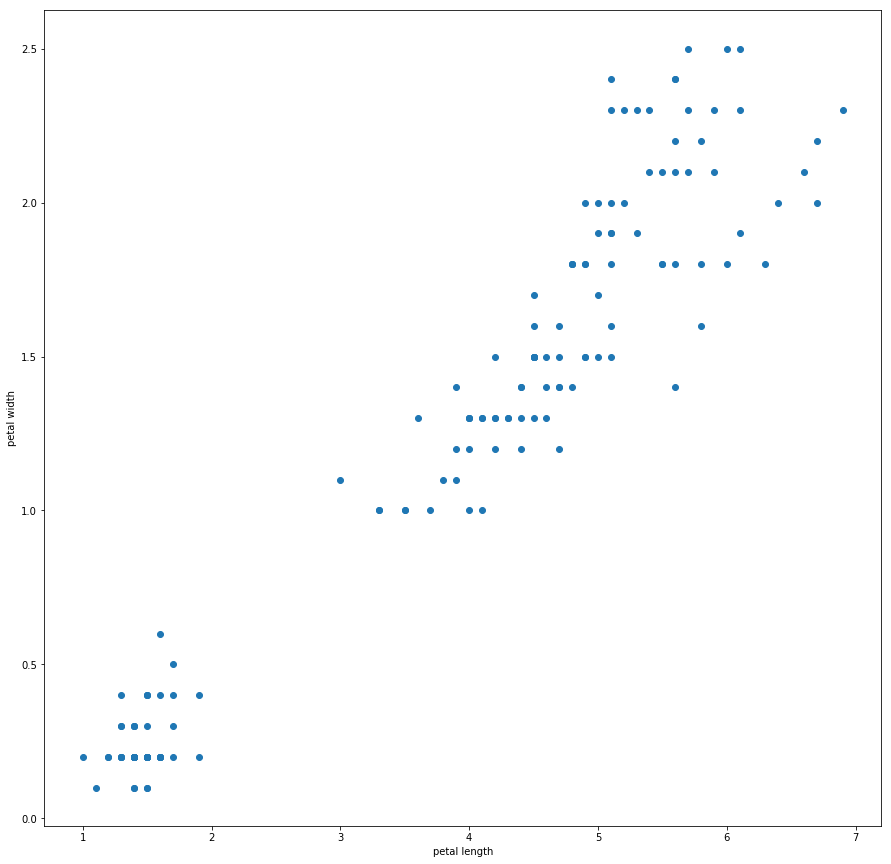

In [49]:
# train Logistic Regression model on two features
x = iris['data'][:, 2:4]
y = (iris['target']==2).astype(np.int) 

log_reg.fit(x,y)
y_pred = log_reg.predict(x)
plt.figure(figsize=(15,15))
plt.scatter(x[:,0], x[:,1])
plt.xlabel('petal length')
plt.ylabel('petal width')

# Figure 4-24. Linear decision boundary to be completed later

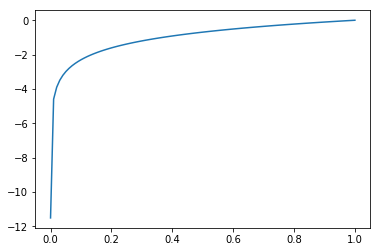

In [32]:
# Just plotting log function to understand cross entropy better

import numpy as np
import math
from matplotlib import pyplot as plt
x = np.linspace(0.00001,1,100)
y = np.log(x)
plt.plot(x,y)

In [47]:
# Softmax regression on Iris data

from sklearn.linear_model import LogisticRegression

x = iris['data'][:,2:4]
y = iris['target']

softmax_reg = LogisticRegression(multi_class = "multinomial", solver="lbfgs",C=10)
softmax_reg.fit(x,y)
print(softmax_reg.predict([[2.7,3]]))
print(softmax_reg.predict_proba([[2.7,3]]))

[1]
[[0.25623293 0.45481293 0.28895414]]
